# 선형 회귀 (Linear Regression)

## 단순 선형 회귀
: Y(종속변수), X(독립변수)가 모두 한개

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
np.random.seed(0)
X = 2*np.random.rand(100)
y = 6 + 4*X + np.random.rand(100) #(w0=6, w1=4)

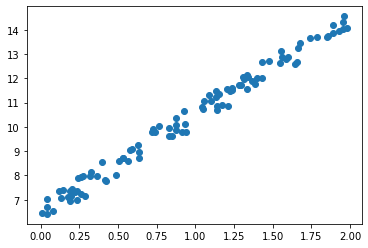

In [21]:
plt.scatter(X, y)

In [22]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(fit_intercept=True)

In [23]:
lr = lr_clf.fit(X.reshape(-1,1), y)
print('회귀 계수값:', lr.coef_)
print('절편값(w0):', lr.intercept_)

회귀 계수값: [3.96827553]
절편값(w0): 6.558080024157022


## 선형 회귀를 이용한 보스턴 주택가격 예측

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
boston = load_boston()

In [22]:
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df[:2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


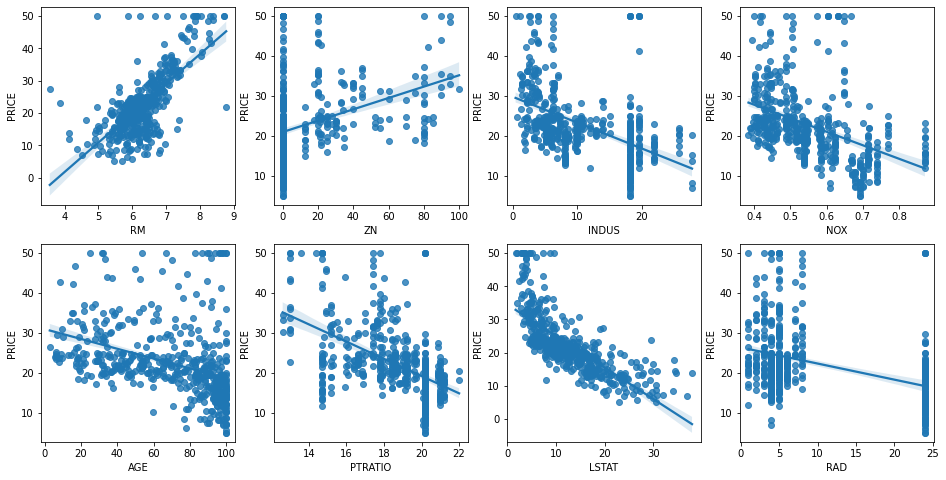

In [23]:
fig, axs = plt.subplots(figsize=(16,8), nrows=2, ncols=4) #subplots(): 여러 개의 그래프를 한번에
for i, feature in enumerate(['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']): #enumerate(): index와 원소를 동시에
    row = int(i/4)
    col = i%4
    sns.regplot(data = boston_df, x=feature, y='PRICE', ax=axs[row][col]) #regplot(): 산점도, 선형 회귀 직선

In [24]:
#LinearRegression을 이용한 분석
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
y_target = boston_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds =lr.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print('MAE: {0:.3F}, MSE: {1:.3f}, RMSE: {2:.3F}, R2: {3:.3F}'.format(mae, mse, rmse, r2))

print('절편 값:', lr.intercept_.round(5))
print('회귀 계수값:', lr.coef_.round(1))

MAE: 3.214, MSE: 17.297, RMSE: 4.159, R2: 0.757
절편 값: 40.9956
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [25]:
#LinearRegression과 cross_val_score을 이용한 분석
from sklearn.model_selection import cross_val_score

X_data = boston_df.drop(['PRICE'],axis=1,inplace=False)
y_target = boston_df['PRICE']

lr = LinearRegression()

#Scikit-learn의 metric 평가 기준에 MSE를 부합시키기 위해서 negative MSE를 scoring에 대입
neg_mse = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
mse = -1*neg_mse.mean()
rmse  = np.sqrt(-1 * neg_mse)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print('5-folds의 개별 Negative MSE:', neg_mse.round(2))
print('5-folds의 평균 MSE:', mse.round(2))
print('5-folds의 개별 RMSE:', rmse.round(2))
print('5-folds의 평균 RMSE:',rmse.mean().round(4))

5-folds의 개별 Negative MSE: [-12.46 -26.05 -33.07 -80.76 -33.31]
5-folds의 평균 MSE: 37.13
5-folds의 개별 RMSE: [3.53 5.1  5.75 8.99 5.77]
5-folds의 평균 RMSE: 5.8287


## 선형 회귀를 이용한 자전거 대여 수요 예측

In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [270]:
bike_df = pd.read_csv('ml_data/bike_train.csv')
bike_df[:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [271]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [272]:
#문자열을 datetime 타입으로 변경
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])

In [273]:
bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['hour'] = bike_df['datetime'].dt.hour

In [274]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [275]:
#불필요한 칼럼 삭제
bike_df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True) 

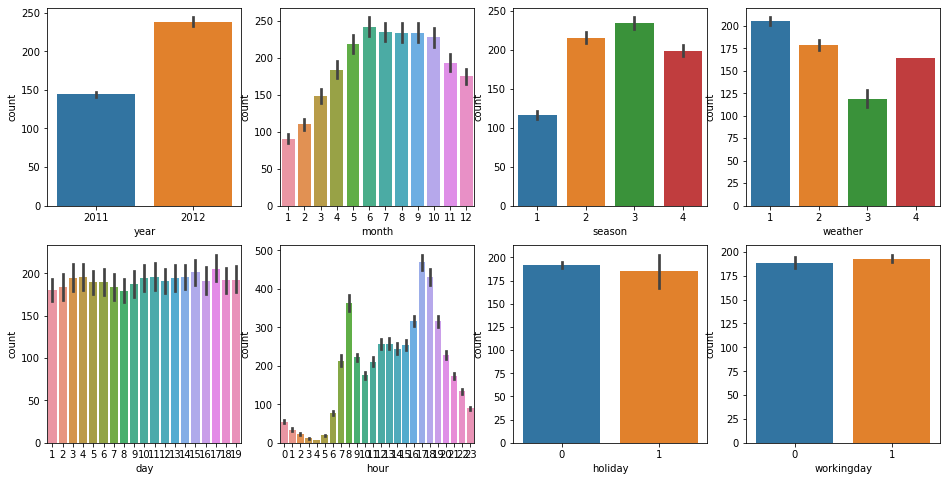

In [285]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']

# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 평균값을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [310]:
from sklearn.model_selection import train_test_split

X_features = bike_df.drop('count', axis = 1, inplace = False)
y_target = bike_df['count']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target)

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

19222.184877581632

In [312]:
#max가 mean에 비해 너무 큼
y_test.describe()

count    2722.000000
mean      189.816312
std       178.214370
min         1.000000
25%        43.250000
50%       147.000000
75%       279.750000
max       943.000000
Name: count, dtype: float64

In [313]:
#따라서 log로 변환
mse = np.mean( (np.log1p(y_test) - np.log1p(y_pred)) ** 2)
mse

1.3684523788938765

In [314]:
#dataset 나눌때 로그로 변환해도 된다
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, np.log1p(y_target))

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

1.017311290511679

In [315]:
#로그를 지수로 변환
np.expm1(y_pred)

array([ 75.89537136,  30.8270256 , 355.2692685 , ...,  49.04249014,
        53.76544512, 488.12152752])

## 다항 회귀 (Polynominal Regression)

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [6]:
X = np.arange(4).reshape(2,2)
print(X) #1차 다항식 계수 feature
poly = PolynomialFeatures(degree = 3)
print(poly.fit_transform(X)) #변환된 2차 다항식 계수 feature

[[0 1]
 [2 3]]
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [7]:
#1차 단항식 계수를 3차 다항식 계수로 변환하고 다항 회귀 계수 구현
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,0]**3
    return y

In [8]:
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

X_poly = PolynomialFeatures(degree = 3).fit_transform(X)

lr = LinearRegression()
lr.fit(X_poly, y)

print(lr.coef_, lr.intercept_) 

[0.         0.07207207 0.07207207 0.14414414 0.21621622 0.28828829
 0.28828829 0.43243243 0.64864865 0.93693694] -0.29729729729729115


In [9]:
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])

model.fit(X, y)
print(model.named_steps['linear'].coef_, model.named_steps['linear'].intercept_)

[0.         0.07207207 0.07207207 0.14414414 0.21621622 0.28828829
 0.28828829 0.43243243 0.64864865 0.93693694] -0.29729729729729115


In [10]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
X = np.sort(np.random.rand(30))
print(X)

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(30) * 0.1
print(y)

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


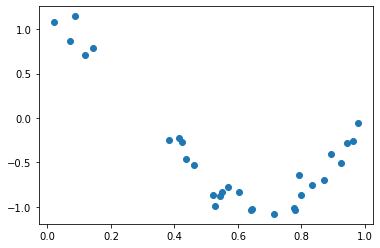

In [13]:
plt.scatter(X,y)

Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.
Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.
Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE 는 182493841.77 입니다.


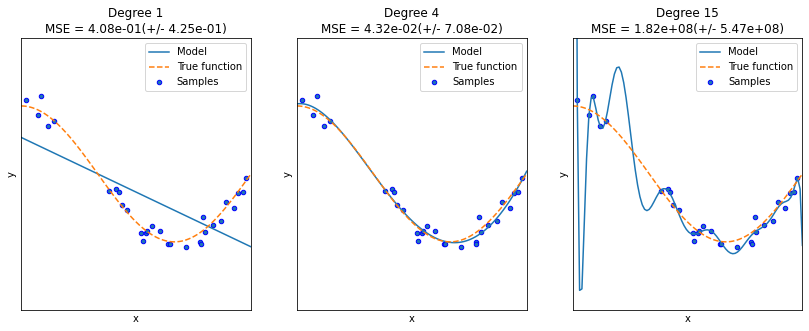

In [18]:
from sklearn.model_selection import cross_val_score

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("poly", polynomial_features), ("linear", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear'].coef_
    print('Degree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

## 규제 선형 모델

### 릿지(Ridge) 회귀
- 선형 회귀에 L2 규제를 추가한 회귀 모델
- L2 규제는 영향력이 큰 회귀 계수값을 더 작게 만드는 규제 모델

In [318]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [319]:
X_data = boston_df.drop(['PRICE'],axis=1,inplace=False)
y_target = boston_df['PRICE']

ridge = Ridge(alpha = 10)
neg_mse = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse = np.sqrt(-1 * neg_mse)

print('5-folds의 개별 Negative MSE:', neg_mse.round(2))
print('5-folds의 개별 RMSE:', rmse.round(2))
print('5-folds의 평균 RMSE:',rmse.mean().round(4))

5-folds의 개별 Negative MSE: [-11.42 -24.29 -28.14 -74.6  -28.52]
5-folds의 개별 RMSE: [3.38 4.93 5.31 8.64 5.34]
5-folds의 평균 RMSE: 5.5182


### 라쏘(Lasso) 회귀
- 선형 회귀에 L1 규제를 추가한 회귀 모델
- L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 선택되지 않게 하는 것

In [320]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [321]:
X_data = boston_df.drop(['PRICE'],axis=1,inplace=False)
y_target = boston_df['PRICE']

lasso = Lasso(alpha = 10)
neg_mse = cross_val_score(lasso, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse = np.sqrt(-1 * neg_mse)

print('5-folds의 개별 Negative MSE:', neg_mse.round(2))
print('5-folds의 개별 RMSE:', rmse.round(2))
print('5-folds의 평균 RMSE:',rmse.mean().round(4))

5-folds의 개별 Negative MSE: [-27.79 -46.4  -80.32 -61.56 -16.3 ]
5-folds의 개별 RMSE: [5.27 6.81 8.96 7.85 4.04]
5-folds의 평균 RMSE: 6.5857


<AxesSubplot:>

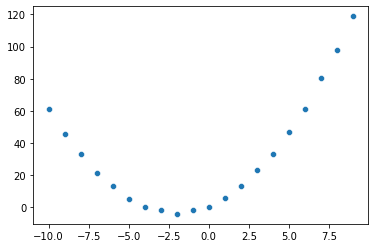

In [323]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

X = np.arange(-10,10)
y = 1 + 4*X + X**2 + np.random.randn(20)

sns.scatterplot(x = X,y = y)

### 엘라스틱넷(Elastic Net) 회귀
- L1 + L2

In [228]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha = 10)
neg_mse = cross_val_score(elasticnet, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse = np.sqrt(-1 * neg_mse)

print('5-folds의 개별 Negative MSE:', neg_mse.round(2))
print('5-folds의 개별 RMSE:', rmse.round(2))
print('5-folds의 평균 RMSE:',rmse.mean().round(4))

5-folds의 개별 Negative MSE: [-26.39 -43.13 -77.93 -60.01 -16.65]
5-folds의 개별 RMSE: [5.14 6.57 8.83 7.75 4.08]
5-folds의 평균 RMSE: 6.472


## 로지스틱 회귀 (Logistic Regression)
: 선형 회귀 방식을 분류에 적용한 알고리즘

# 비선형 회귀 (Nonlinear Regression)
: 모든 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능하다
- DecisionTreeRegressor, RandomForestRegressor, XGBRegressor, LGBMRegressor